In [1]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [2]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training_extra.transfer_learning.meta import fetch_meta
from thesis_v2.training_extra.transfer_learning.analysis import collect_one_setting

In [3]:
folder_to_check = 'scripts/training/crcns_pvc8_large/transfer_learning_factorized_vgg'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit import param_iterator, sparse_list, feature_file_name
from key_utils import keygen

num_sparse = len(sparse_list)

In [4]:
def load_everything():
    _df_collect = []
    argmax_all = []
    for idx, param in enumerate(param_iterator(include_sparse=False)):
        if idx % 5 == 0:
            print(idx)
        assert param['split_seed'] == 0 and param['model_seed'] == 0
        
#         if param['loss_type'] != 'mse':
#             continue
            
#         if param['act_fn'] != 'softplus':
#             continue
        
        # get meta
        with h5py.File(feature_file_name, 'r') as f_feature:
            meta_this = fetch_meta(f_feature['large/' + param['suffix']], 'large/' + param['suffix'])
        assert meta_this['dataset'] == 'large'
        assert meta_this['layer_unroll'] == 0
        
        performance_result = collect_one_setting(
            sparse_list = sparse_list,
            keygen=keygen,
            param=param,
            num_neuron=221,
        )
       
        _df_collect.append({
            'network': meta_this['network'],
            'shuffle_type': param['shuffle_type'],
            'scale,loss,act': f"{meta_this['setting']},{param['loss_type']},{param['act_fn']}",
            'layer': '{:02d}.{}'.format(meta_this['layer_idx'], meta_this['layer_name']),
            'corr_test': performance_result['test_best'].mean(),
        })
        
        # which sparsity setting is used.
        argmax_all.append(performance_result['argmax'])
        
    argmax_all = np.concatenate(argmax_all, axis=0)
    # looks good. most neurons select middle ones.
    
    # remove -1 ones.
    argmax_all = argmax_all[argmax_all!=-1]
    print(np.bincount(argmax_all)/argmax_all.size)

    _df =  pd.DataFrame(_df_collect, columns=['shuffle_type', 'network', 'scale,loss,act', 'layer', 'corr_test'])
    _df = _df.set_index(['shuffle_type', 'network', 'scale,loss,act', 'layer'], verify_integrity=True)
    return _df

In [5]:
df = load_everything()

['vgg11/half/1.0', 'vgg11/half/2.0', 'vgg11/half/3.0', 'vgg11/half/4.0', 'vgg11/half/5.0', 'vgg11/half/6.0', 'vgg11/half_full/1.0', 'vgg11/half_full/2.0', 'vgg11/half_full/3.0', 'vgg11/half_full/4.0', 'vgg11/half_full/5.0', 'vgg11/half_full/6.0', 'vgg11/quarter_full/1.0', 'vgg11/quarter_full/2.0', 'vgg11/quarter_full/3.0', 'vgg11/quarter_full/4.0', 'vgg11/quarter_full/5.0', 'vgg11/quarter_full/6.0', 'vgg11_bn/half/1.0', 'vgg11_bn/half/2.0', 'vgg11_bn/half/3.0', 'vgg11_bn/half/4.0', 'vgg11_bn/half/5.0', 'vgg11_bn/half/6.0', 'vgg11_bn/half_full/1.0', 'vgg11_bn/half_full/2.0', 'vgg11_bn/half_full/3.0', 'vgg11_bn/half_full/4.0', 'vgg11_bn/half_full/5.0', 'vgg11_bn/half_full/6.0', 'vgg11_bn/quarter_full/1.0', 'vgg11_bn/quarter_full/2.0', 'vgg11_bn/quarter_full/3.0', 'vgg11_bn/quarter_full/4.0', 'vgg11_bn/quarter_full/5.0', 'vgg11_bn/quarter_full/6.0', 'vgg16/half/2.0', 'vgg16/half/3.0', 'vgg16/half/4.0', 'vgg16/half/5.0', 'vgg16/half/6.0', 'vgg16/half/7.0', 'vgg16/half/8.0', 'vgg16/half/9.0

In [6]:
df
# results match old file.

corr_test
shuffle_type network  scale,loss,act                layer                
legacy       vgg11    half,poisson,softplus         01.pool1     0.597184
                      half,mse,softplus             01.pool1     0.600367
                      half,poisson,relu             01.pool1     0.616832
                      half,mse,relu                 01.pool1     0.613849
paired       vgg11    half,poisson,softplus         01.pool1     0.520946
                      half,mse,softplus             01.pool1     0.518027
                      half,poisson,relu             01.pool1     0.546580
                      half,mse,relu                 01.pool1     0.532640
legacy       vgg11    half,poisson,softplus         02.conv2_1   0.668909
                      half,mse,softplus             02.conv2_1   0.665356
                      half,poisson,relu             02.conv2_1   0.672547
                      half,mse,relu                 02.conv2_1   0.669634
paired       vgg11    half,poisson,softplus         02.conv2_1   0.606338
                      half,mse,softplus             02.conv2_1   0.603638
                      half,poisson,relu             02.conv2_1   0.617588
                      half,mse,relu                 02.conv2_1   0.603891
legacy       vgg11    half,poisson,softplus         03.pool2     0.682211
                      half,mse,softplus             03.pool2     0.671519
                      half,poisson,relu             03.pool2     0.689487
                      half,mse,relu                 03.pool2     0.690202
paired       vgg11    half,poisson,softplus         03.pool2     0.619373
                      half,mse,softplus             03.pool2     0.615352
                      half,poisson,relu             03.pool2     0.637808
                      half,mse,relu                 03.pool2     0.627129
legacy       vgg11    half,poisson,softplus         04.conv3_1   0.659026
                      half,mse,softplus             04.conv3_1   0.658263
                      half,poisson,relu             04.conv3_1   0.655222
                      half,mse,relu                 04.conv3_1   0.652600
paired       vgg11    half,poisson,softplus         04.conv3_1   0.603426
                      half,mse,softplus             04.conv3_1   0.598640
                      half,poisson,relu             04.conv3_1   0.607238
                      half,mse,relu                 04.conv3_1   0.604055
legacy       vgg11    half,poisson,softplus         05.conv3_2   0.547197
                      half,mse,softplus             05.conv3_2   0.545826
                      half,poisson,relu             05.conv3_2   0.556704
                      half,mse,relu                 05.conv3_2   0.556289
paired       vgg11    half,poisson,softplus         05.conv3_2   0.481872
                      half,mse,softplus             05.conv3_2   0.472661
                      half,poisson,relu             05.conv3_2   0.477919
                      half,mse,relu                 05.conv3_2   0.483338
legacy       vgg11    half,poisson,softplus         06.pool3     0.648570
                      half,mse,softplus             06.pool3     0.648446
                      half,poisson,relu             06.pool3     0.652562
                      half,mse,relu                 06.pool3     0.653236
paired       vgg11    half,poisson,softplus         06.pool3     0.590495
                      half,mse,softplus             06.pool3     0.590722
                      half,poisson,relu             06.pool3     0.607711
                      half,mse,relu                 06.pool3     0.599009
legacy       vgg11    half_full,poisson,softplus    01.pool1     0.555928
                      half_full,mse,softplus        01.pool1     0.544664
                      half_full,poisson,relu        01.pool1     0.559500
                      half_full,mse,relu            01.pool1     0.573384
paired       vgg11    half_full,poisson,softplus    01.pool1     0.5

In [7]:
# for loop visualize every thing.

def visualize(shuffle_type):
    df_corr_only = df['corr_test'].xs(shuffle_type, level='shuffle_type')
    for net in df_corr_only.index.get_level_values('network').unique():
        print(net)
        plt.close('all')
        df_this = df_corr_only.xs(net, level='network')
        df_this.unstack('scale,loss,act').sort_index().plot(rot=45)
        plt.show()

vgg11


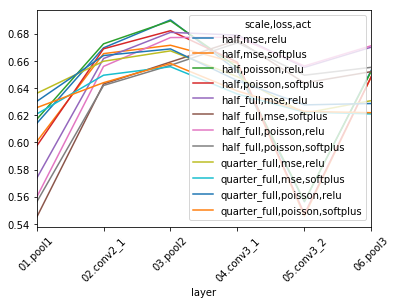

vgg11_bn


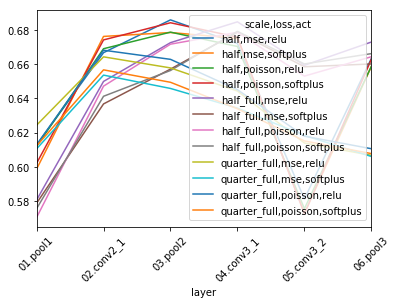

vgg16


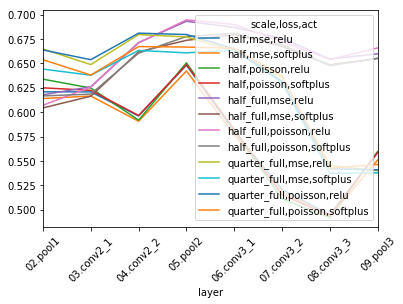

vgg16_bn


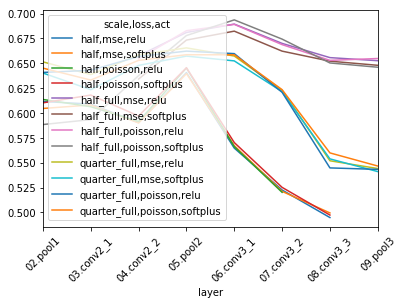

In [8]:
visualize('legacy')
# roughly matching old results
# <https://github.com/leelabcnbc/thesis-yimeng-v1/blob/master/results_ipynb/crcns_pvc-8_large/transfer_learning_factorized_legacy.ipynb>

vgg11


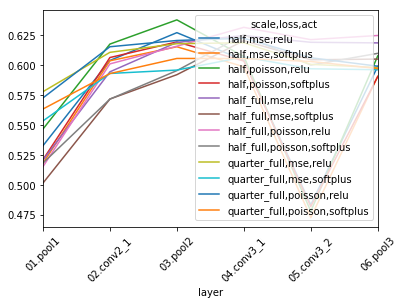

vgg11_bn


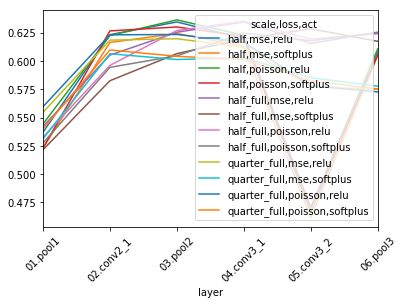

vgg16


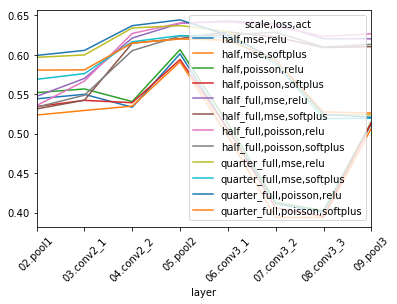

vgg16_bn


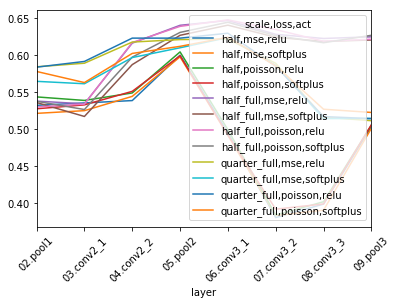

In [9]:
visualize('paired')